#### Hi again! This is the companion notebook for the Week 4 class, on Regression. It is supposed to be used on the class, with the support from the teachers. 

------------------

# Part 1

We'll give you the imports, just to simplify.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  
import numpy as np
from sklearn import datasets, linear_model

Create a function that simulates a model $y=\beta_0+\beta_1*x+\epsilon \text{   } $. We give you the first line (signature):

>def generate_simple_model(X, beta0, beta1, sigma2):

where X is a vector with x values, beta0 and beta1 are the parameters, and sigma2 is the standard deviation of the error term. 

In [3]:
np.random.normal(scale=9, size=9)

array([  0.31907181,  12.1150892 , -13.52969785,  -0.27772066,
        -6.72639898,  -9.90463645,  -2.36514543,   6.38214851,
        -0.39662881])

In [4]:
def generate_simple_model(X, beta0, beta1, sigma2):
    return beta0+X*beta1+np.random.normal(scale=sigma2, size=len(X))

This function will allow you to create data to play with, below. 

Let's just test it, with a model that is $y=-1+3*x+N(0,\sigma^2)\text{   }$ (i.e. standard deviation is $\sigma$, variance is $\sigma^2$)

First, with NO error ($\sigma=0$)!

24 [-1.  2.  5.  8. 11. 14. 17. 20. 23. 26. 29. 32. 35. 38. 41. 44. 47. 50.
 53. 56. 59. 62. 65. 68.]


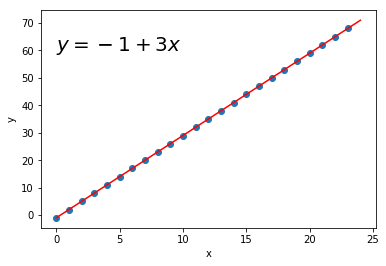

In [5]:
Xe=np.arange(24)    
ye=generate_simple_model(Xe, -1, 3, 0)#[-1+3*x for x in Xe]
print(len(Xe),ye)
plt.scatter(Xe, ye)
plt.annotate('$y=-1+3x$', xy=(0, 60), xytext=(0, 60), fontsize=20)
plt.plot([0,24], [-1, 71], color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Now, with a little bit of error ($\sigma=9$)

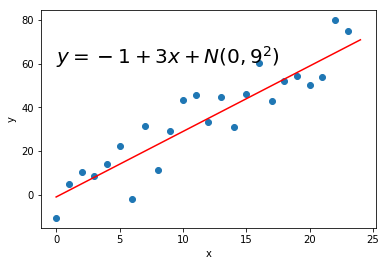

In [6]:
sigma2=9
ye=generate_simple_model(Xe, -1, 3, sigma2)
plt.scatter(Xe, ye)
plt.annotate('$y=-1+3x+N(0,9^2)$', xy=(0, 60), xytext=(0, 60), fontsize=20)
plt.plot([0,24], [-1, 71], color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

This is just ONE sample (i.e. one possible dataset) that could be generated by our simple model. It is important to see that each model actually implies a full distribution of data.

To make this point more clear, let's generate a very large number (e.g. 500) of samples and plot them at the same time.

We generate them, you plot them, ok? ;-)

In [22]:
Xe=np.arange(0, 24, 0.01)

In [23]:
N_fun=500  #number of functions to generate
ys=[]
for i in range(N_fun):
    ys.append(generate_simple_model(Xe, -1, 3, 9))

Y=np.matrix(ys)


In [26]:
Y.shape

(500, 2400)

In [28]:
Xe=Xe.reshape((1,2400))

Can you plot it, then?

In [29]:
def plot_simple_data(X, y, alpha=0.01, s=0.5):
    plt.scatter(X, y, s=s)
    plt.yticks(range(-25, 200, 25), size=20)
    plt.xticks(range(0, 30, 5), size=20)
    plt.xlabel("x")
    plt.ylabel("y")

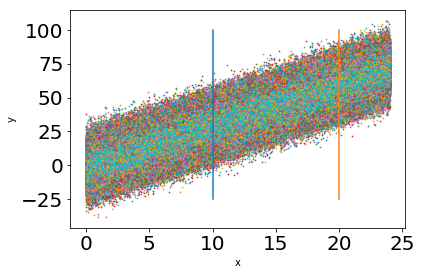

In [35]:
import time
for y in ys:
    plot_simple_data(Xe, y)
#    plt.show()
 #   time.sleep(0.5)
plt.plot([10,10], [-25, 100])
plt.plot([20,20], [-25, 100])


What does this mean? 

An interesting way to look is to do like a "vertical cut" of the graph (like a cross-section, or transversal cut). 

Make a histogram of the data at x=10 and at x=20. Can you see them in the figure above?

In [44]:
np.where(Xe==10)[1]

array([1000])

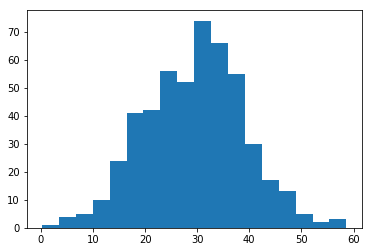

In [46]:
ind=np.where(Xe==10)[1]   #to find where x=10

plt.hist(Y[:,ind], bins='auto')
plt.show()

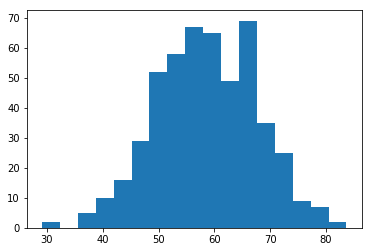

In [47]:
ind=np.where(Xe==20)[1]
plt.hist(Y[:,ind], bins='auto')
plt.show()

----------------

# Part 2

Create a function that implements the linear regression estimator, based on the slides. 

It should look like:

>def my_lin_reg(x, y):
>
>      \# put your code here... ;-)
>
>      return beta0, beta1



In [48]:
def my_lin_reg(x, y):
    y_mean=np.mean(y)
    x_mean=np.mean(x)
    
    my_sum_numerator=0
    my_sum_denominator=0
    for xj, yj in zip(x, y):
        my_sum_numerator+=(yj-y_mean)*(xj-x_mean)
        my_sum_denominator+=(xj-x_mean)**2
    
    beta1=my_sum_numerator/my_sum_denominator
    beta0=y_mean-beta1*x_mean
    
    return beta0, beta1

Now, let's use a small dataset, just to try your solution!

In [91]:
x=np.arange(1000)
y=generate_simple_model(x, -1, 3, 9)
beta0, beta1=my_lin_reg(x,y)
print("my linear regression: \n beta0=%f, beta1=%f"%(beta0, beta1))

my linear regression: 
 beta0=-1.506778, beta1=3.000590


Ok, now you were able to estimate the parameters of the linear regression (the values of betas). The only missing part is how to predict. In  other words, given a new input, x, what is the respective (predicted) y?

Can you write the function? It should look like:

> def predict(x, beta0, beta1):
>        \# ... put your code here ;-)
>
>        return y

In [92]:
def predict(x, beta0, beta1):
    return beta0+x*beta1

Congrats, you have built your own first Machine Learning Regression algorithm!

...sadly, you didn't have to. You could have used sklearn!... 

**sklearn is a VERY popular Python module in Data Sciences. Make sure you have it installed.**

This is how it would look like, with sklearn:

In [93]:
x,y

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [94]:
regr=linear_model.LinearRegression(fit_intercept=False)
x_= np.c_[np.ones(len(x)),np.array(x)]
regr.fit(np.matrix(x_), y)
print("sklearn linear regression:", regr.coef_)

sklearn linear regression: [-1.50677804  3.00058963]


In [103]:
regr=linear_model.LinearRegression(fit_intercept=False)
x_= np.c_[np.ones(len(x)),np.array(x)]
regr.fit([[1,i] for i in x], y)
print("sklearn linear regression:", regr.coef_)

sklearn linear regression: [-1.50677804  3.00058963]


You should find almost no difference...

The same for predictions...

In [104]:
print(predict(x, beta0, beta1))
print(regr.predict(x_))


[-1.50677804e+00  1.49381159e+00  4.49440123e+00  7.49499086e+00
  1.04955805e+01  1.34961701e+01  1.64967598e+01  1.94973494e+01
  2.24979390e+01  2.54985287e+01  2.84991183e+01  3.14997079e+01
  3.45002976e+01  3.75008872e+01  4.05014768e+01  4.35020665e+01
  4.65026561e+01  4.95032457e+01  5.25038353e+01  5.55044250e+01
  5.85050146e+01  6.15056042e+01  6.45061939e+01  6.75067835e+01
  7.05073731e+01  7.35079628e+01  7.65085524e+01  7.95091420e+01
  8.25097317e+01  8.55103213e+01  8.85109109e+01  9.15115006e+01
  9.45120902e+01  9.75126798e+01  1.00513269e+02  1.03513859e+02
  1.06514449e+02  1.09515038e+02  1.12515628e+02  1.15516218e+02
  1.18516807e+02  1.21517397e+02  1.24517987e+02  1.27518576e+02
  1.30519166e+02  1.33519755e+02  1.36520345e+02  1.39520935e+02
  1.42521524e+02  1.45522114e+02  1.48522704e+02  1.51523293e+02
  1.54523883e+02  1.57524472e+02  1.60525062e+02  1.63525652e+02
  1.66526241e+02  1.69526831e+02  1.72527421e+02  1.75528010e+02
  1.78528600e+02  1.81529

Obviously equal...

You should also notice that there can be quite some substantial error in the beta estimates (compare the results you get with the "true" model...).

Notice that you have a very small dataset (10 points). The question arises: does the error become smaller with larger datasets?

In [ ]:
#Interruption 23 (OLS)

trueBeta0=-1
trueBeta1=3
trueSigma=9
N=np.arange(3, 100000)
diff0=[]
diff1=[]
for n in N:
    x=np.arange(n)
    y=generate_simple_model(x, trueBeta0, trueBeta1, trueSigma)
    beta0, beta1=my_lin_reg(x,y)
    diff0.append(abs(trueBeta0-beta0))
    diff1.append(abs(trueBeta1-beta1))
    
plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(N, diff0, label="Error in beta0")
plt.plot(N, diff1, label="Error in beta1")
plt.legend(prop={'size':60})
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.xlabel("N (dataset size)", size=30)
plt.ylabel("Error", size=30)
plt.show()


Interesting, isn't it? Notice that the intercept converges much slower than the coefficient of x. Why would that be?...

Let's now check how the model is able to approximate sigma (the standard deviation of the error term) as the number of data points grow.

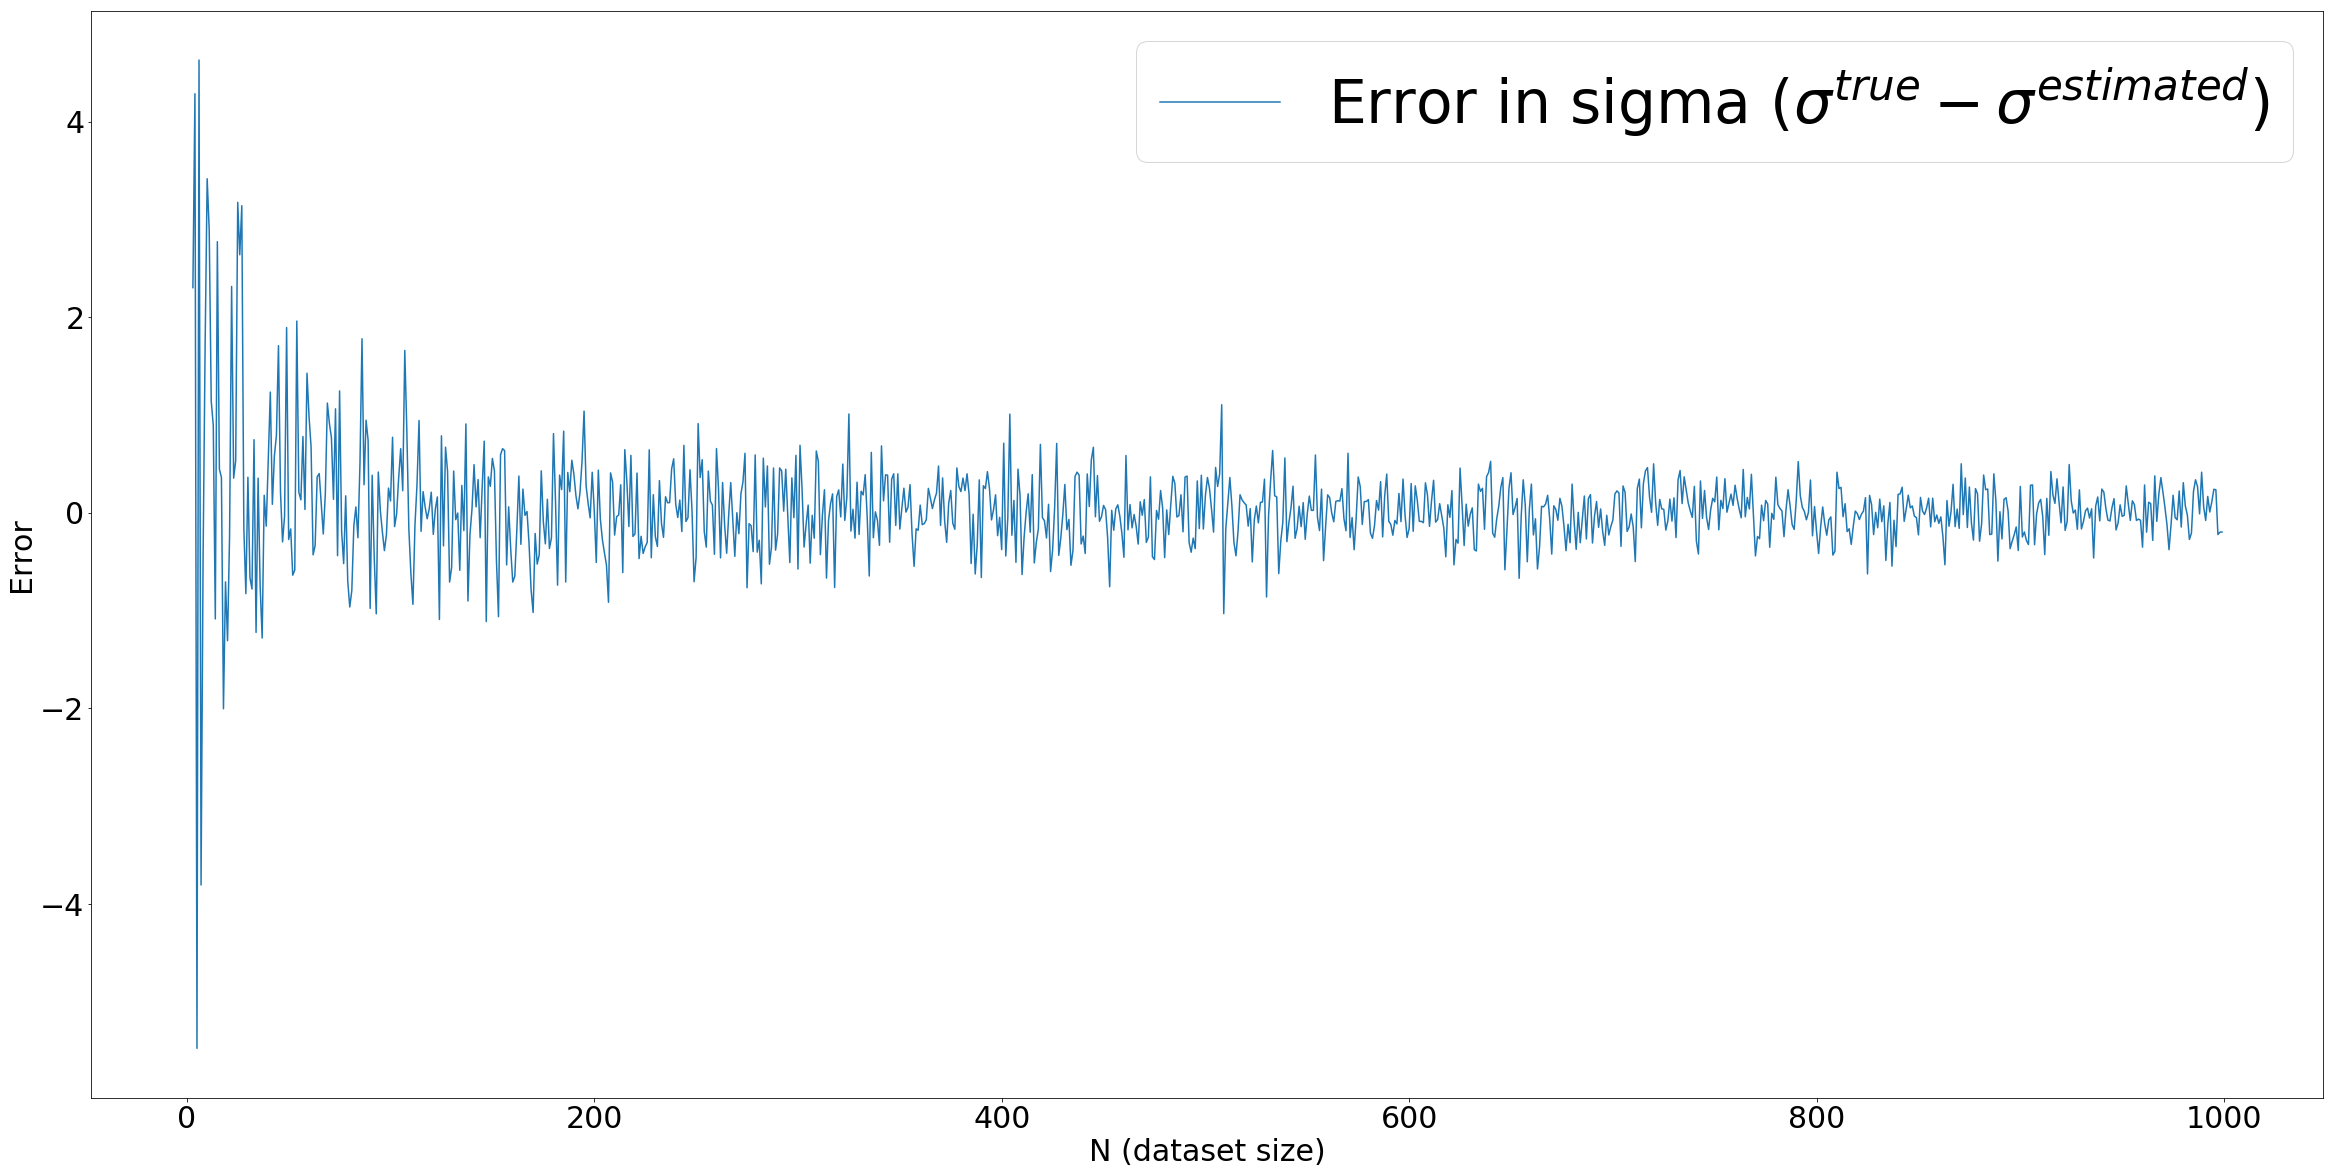

In [17]:
#Interruption 23 (OLS)

trueSigma=9
N=np.arange(3, 1000)
sigma=[]
for n in N:
    x=np.arange(n)
    y=generate_simple_model(x, trueBeta0, trueBeta1, trueSigma)
    beta0, beta1=my_lin_reg(x,y)
    predictions=np.array([predict(xj, beta0, beta1) for xj in x])
    sigma.append(trueSigma-np.sqrt(np.dot(predictions-np.array(y), predictions-np.array(y))/(n-1)))
    
plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(N, sigma, label="Error in sigma ($\sigma^{true}-\sigma^{estimated}$)")
plt.legend(prop={'size':60})
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel("N (dataset size)", size=30)
plt.ylabel("Error", size=30)
plt.show()



It seems to converge a bit...

Another way to look at this is to see the distribution of sigma as more data is available. Can you make that graph?


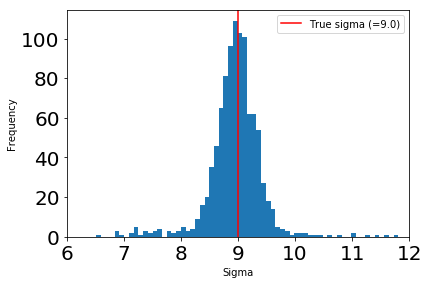

In [18]:
trueSigma=9
N=np.arange(3, 1000)
sigma=[]
for n in N:
    x=np.arange(n)
    y=generate_simple_model(x, trueBeta0, trueBeta1, trueSigma)
    beta0, beta1=my_lin_reg(x,y)
    predictions=np.array([predict(xj, beta0, beta1) for xj in x])
    sigma.append(np.sqrt(np.dot(predictions-np.array(y), predictions-np.array(y))/(n-1)))
    
plt.hist(sigma, bins='auto')
plt.tight_layout()
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.axvline(x=9, color="red", label="True sigma (=%.1f)"%trueSigma)
plt.xlim([6,12])
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel("Sigma", size=10)
plt.ylabel("Frequency", size=10)
plt.legend()
plt.show()

Now let's go a bit more crazy, and add much more datapoints... 

**IMPORTANT: this may take a long time, way too long, depending on your computer...**

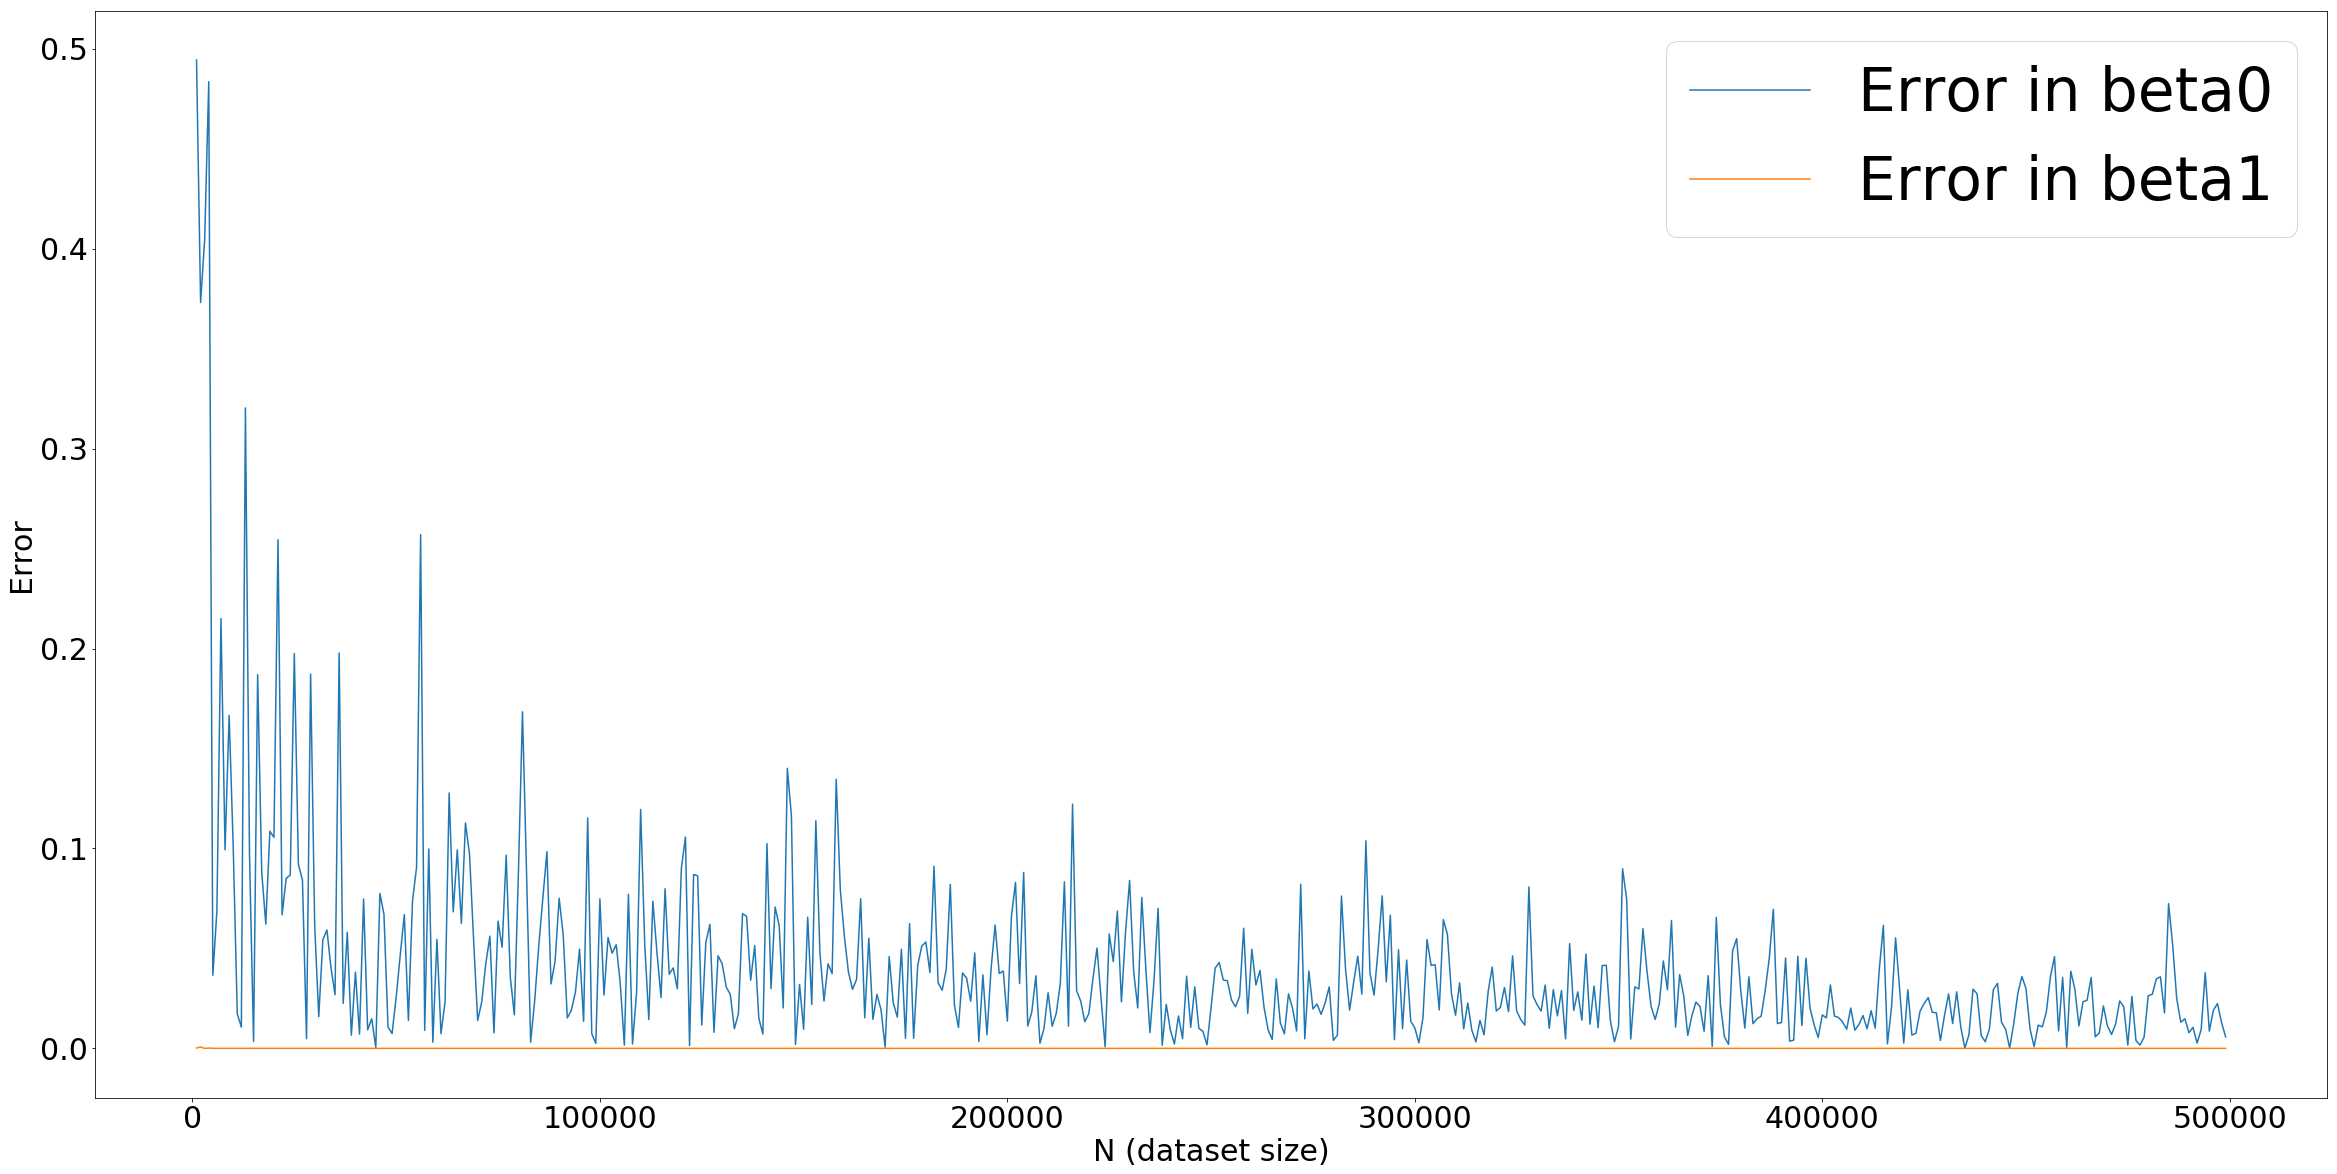

In [20]:
#Interruption 23 (OLS)

trueBeta0=-1
trueBeta1=3
trueSigma=9
N=np.arange(1000, 500000, 1000)
diff0=[]
diff1=[]
for n in N:
    x=np.arange(n)
    y=generate_simple_model(x, trueBeta0, trueBeta1, trueSigma)
    beta0, beta1=my_lin_reg(x,y)
    diff0.append(abs(trueBeta0-beta0))
    diff1.append(abs(trueBeta1-beta1))

plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(N, diff0, label="Error in beta0")
plt.plot(N, diff1, label="Error in beta1")
plt.legend(prop={'size':60})
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel("N (dataset size)", size=30)
plt.ylabel("Error", size=30)
plt.show()



It seems to converge all right (NOTICE the y axis scale, and compare with the previous one!). In fact, the error for beta1 is practically zero since very early, while beta0 tends to have a small error.

-----

# Part 3

Let's now use the NYC dataset, having x=hour, as in the slides...

We have to run the least squares algorithm on it.

In [21]:
f=pd.read_csv("pickups_zone_1_15min.csv")
#Same code as above, just for reference (and to initialize the variables, just in case...)

x= np.c_[np.ones(len(f)),f['hour']]
y= np.array(f['pickups'], ndmin=2).T

regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);


Let's check: are the OLS conditions verified?


We now do not know the true distribution. We only have the data. 

For the expected value of epsilon, $E(\epsilon_j)$, we will average from the sample. We have done this exact same thing before, remember?


In [22]:
error=regr.predict(x) - y
print("Expected value of the error (or Average error, AE): %.2f" % np.mean(error))

Expected value of the error (or Average error, AE): 0.00


For the variance, we can apply the formula in the slides, $s^2=\frac{\epsilon^T \epsilon}{n-2}$

In [23]:
print("variance of all data is:", np.var(error))

variance of all data is: 9966.720464327069


Hmmm... There's nothing wrong with these numbers, is there? Well, of course the AE would be 0 for all data! And the variance is one single value (9966.72...), so of course it's... constant!

Well, kind of... We can make some basic checks to see more.

For example, we can split the dataset into two chunks, and check if the variance is the same... An idea: divide data into before noon and after noon.

In [24]:
fmorning=f.loc[f['hour'] <= 12]
fafternoon=f.loc[f['hour'] > 12]

let's now compare the means and variances in the model

In [25]:
x_morning=np.c_[np.ones(len(fmorning)),fmorning['hour']]
y_morning=np.array(fmorning['pickups'], ndmin=2).T
error_morning=regr.predict(x_morning) - y_morning

print("mean of error on morning data is:", np.mean(error_morning))
print("variance of error on morning data is:", np.var(error_morning))

x_afternoon=np.c_[np.ones(len(fafternoon)),fafternoon['hour']]
y_afternoon=np.array(fafternoon['pickups'], ndmin=2).T
error_afternoon=regr.predict(x_afternoon) - y_afternoon

print("mean of error on afternoon data is:", np.mean(error_afternoon))
print("variance of error on afternoon data is:", np.var(error_afternoon))



mean of error on morning data is: -2.433194473626034
variance of error on morning data is: 11516.217528152942
mean of error on afternoon data is: 2.8755934688308233
variance of error on afternoon data is: 8120.230745689025


so... a little different, uh? Since the two datasets are extremely large, we can assume that indeed the true variance is not constant. The picture below gives an intuition of what's happening

![alt text](mean_variance_diagram.png "Mean Variance intuition")


If the dataset is so different in those two parts of the day, a solution would be to create two separate models (one for morning, another for the afternoon) or simply add an extra (dummy) variable indicating whether we're at morning or afternoon. But, for the sake of not distracting ourselves, let's keep with a single one for now. 

-----

# Part 4

So, let's play with more variables in our model, starting with hour and minute.

In [26]:
x=np.c_[np.ones(len(f)),f['hour'], f['minute']]
y= np.array(f['pickups'], ndmin=2).T

regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);
print(regr.coef_)

[[1.02632496e+02 1.09022384e+01 3.85391811e-02]]


It is now very difficult to visualize, with two x variables!

So, we will now use a 45 degree plot (predicted pickups VS observed pickups)

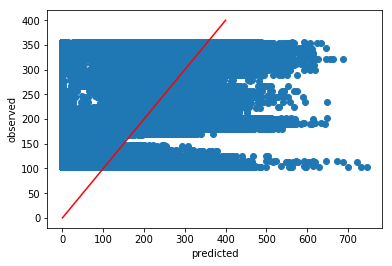

In [27]:
plt.scatter(y, regr.predict(x))
plt.xlabel("predicted")
plt.ylabel("observed")
plt.plot([0, 400], [0, 400], color="red")
plt.show()

Hmmm... it looks TERRIBLE!... What are the error statistics now?

In [28]:
print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x) - y)))
# The mean squared error
print("Root Mean squared error: %.2f"
      % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))

Mean Absolute error (MAE): 80.60
Root Mean squared error: 99.83


Wow, it did NOT improve AT ALL!!!!  :-(

In [29]:
f.corr()

,hour,minute,pickups
hour,1.000000,0.000000,0.603024
minute,0.000000,1.000000,0.005164
pickups,0.603024,0.005164,1.000000


The same function that we used in the last week

In [30]:
def buildLaggedFeatures(s,columns, lag=2,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

Let's also create a function to make our 45 degree linear regression plots and provide some statistics at one go:

In [31]:
def my_plot(regr, x, y, xlab="x", ylab="y", size=0.1, reg=True):

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean absolute error    
    print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x) - y)))
    # The mean squared error
    print("Root Mean squared error: %.2f"
          % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x, y))

    if x.shape[1]>1:
        x_uni=x[:,1]
    else:
        x_uni=x
            
    # Plot outputs
    plt.scatter(x_uni, y,  color='black', s=size)
    if reg:
        plt.plot(x_uni, regr.predict(x), color='blue',linewidth=3)
    plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    plt.show()

In [32]:
f_lagged=buildLaggedFeatures(f, ['pickups'], lag=2)
fllen=len(f_lagged)

In [33]:
f_lagged.head()

,date,hour,minute,pickups,pickups_lag1,pickups_lag2
2,2009-01-01,0,30,215,166.0,0.0
3,2009-01-01,0,45,223,215.0,166.0
4,2009-01-01,1,0,245,223.0,215.0
5,2009-01-01,1,15,182,245.0,223.0
6,2009-01-01,1,30,181,182.0,245.0


And we have a more complete model now... what about the results?

In [34]:
x=np.c_[np.ones(len(f_lagged)),f_lagged['pickups_lag1'], f_lagged['pickups_lag2']]

In [35]:
y=np.array(f_lagged['pickups'], ndmin=2).T

In [36]:
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);

Coefficients: 
 [[5.30465767e+00 9.71728221e-01 5.09589615e-03]]
Mean Absolute error (MAE): 20.39
Root Mean squared error: 26.85
Variance score: 0.95


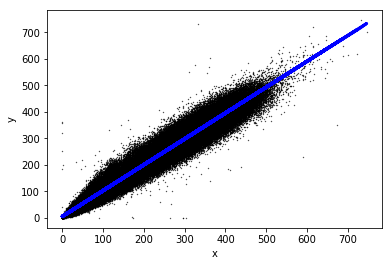

In [37]:
my_plot(regr, x, y)


Yes, waaaay better!... :-)

_Now, it's your turn! Can you improve this model further?_